<a href="https://colab.research.google.com/github/MiladQolami/BasicNeuralDataAnalysis/blob/main/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics of Spike Train visualization**

### Loadng data and defining initial parameters


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from scipy.signal import savgol_filter
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)



spikes = sio.loadmat('spikes.mat')
type(spikes)
spikes.keys()
spikes = spikes['spikes']
nTrials = np.shape(spikes)[0]

### **Raster plot**

#### A single raster 

<ipython-input-7-08dadbe3668d>:1: DeprecationWarning: This function is deprecated. Please call randint(1, 540 + 1) instead
  RandomTrial = np.random.random_integers(nTrials)


Text(0.5, 1.0, 'Raster plot of a random trial')

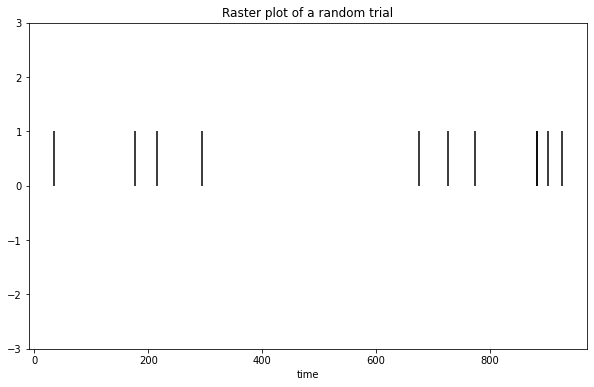

In [7]:
RandomTrial = np.random.random_integers(nTrials)
plt.vlines(np.argwhere(spikes[RandomTrial,:]),0,1)
plt.ylim([-3, 3])
plt.xlabel('time')
plt.title('Raster plot of a random trial')

  #### Raster of all 
  In this section we devide all trials into two conditions and then plot raster for each condition. First condition are those trials where face stimuli were presented.

In [42]:
StimTags = sio.loadmat('trial_idx.mat')
StimTags = StimTags['trial_idx']
FaceStimTags = StimTags[((StimTags>=0) & (StimTags<20))]
NonFaceStimTags = 
for i in range(540):
  plt.vlines(np.argwhere(spikes[i,:]),i-1,i)
plt.axvspan(200,500,color = 'g',alpha=.2)
plt.xlabel('Time(ms)')
plt.ylabel('#Trials')
plt.show()


In [34]:
StimTags[0]

IndexError: ignored

### **Pre Stimulus Time Histogram (PSTH)**

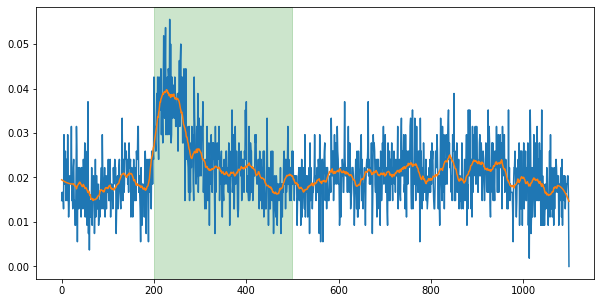

In [4]:
mean_resp = np.mean(spikes,0)
smooth_mean_resp = savgol_filter(mean_resp,51,2)
plt.figure(figsize=(10,5))
plt.plot(mean_resp)
plt.plot(smooth_mean_resp)
plt.axvspan(200,500,color = 'g',alpha=.2)
plt.show()

### **Inter Spike Interval** (ISI)

In [71]:
isi = np.diff(np.where(spikes[25,:]))
print(isi)

[[  8  12  62   8   1   9 108   9   5   2  35 567]]


In [58]:
np.where?

In [67]:
from scipy.linalg.decomp import nonzero
